In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from iminuit import Minuit

In [107]:
'''fattore moltiplicativo (in genere1), Qt, Qi, rotazione, f di risonanza, termine fondo lineare, fondoquadratico, fondo cubico'''

def resonance(x, Q, Q_c, phi0, fmin, a1, a2):
    f = (x-fmin)/fmin
    num = pow(Q,2) - 2*np.sin(phi0)*Q*Q_c - 4*np.cos(phi0)*pow(Q,2)*Q_c*f
    den = 1 + pow((2*Q*f),2)
    return (a1 + a2*f)*np.sqrt(1 + num/den)

In [108]:
stringa = 'C:/Users/kid/SynologyDrive/Lab2023/KIDs/QTLab2324/IRDetection/Test_data/Resonance02.txt'
dati = list(np.genfromtxt(stringa))

In [123]:
f = []
Q = []
I = []
for i in dati:
    f.append(i[0])
    I.append(i[1])
    Q.append(i[2])
f = np.array(f)/1e9
Q = np.array(Q)
I = np.array(I)

S21 = np.sqrt(I**2 + Q**2)

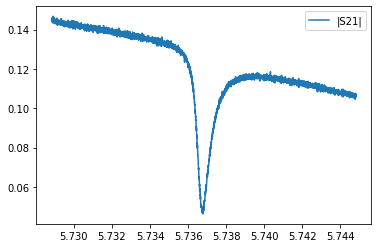

In [124]:
plt.plot(f,S21, label='|S21|')
plt.legend()

In [137]:
'''fattore moltiplicativo (in genere1), Qt, Qi, rotazione, f di risonanza, termine fondo lineare, fondoquadratico, fondo cubico'''
fmin = float(f[S21==min(S21)])
m = (S21[-1]-S21[0])/(f[-1]-f[0])
q = m*f[0]-S21[0]
params = [1e3, 1e4, 1.5, fmin, -m, q]
print('fmin: ', fmin)
print('m   : ', m)
print('q   : ', q)

fmin:  5.7367842
m   :  -2.3792818472495525
q   :  -13.775284185641144
